<a href="https://colab.research.google.com/github/amf599-cyber/CMD_LAB7-8/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# all imports needed for Lab + any of the utilities found on CMD website (data.py, test.py,...)
!pip install optuna==2.4.0

import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import optuna
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import time, sys, os


In [ ]:
file_path = '/content/Maps_Mtot_Nbody_SIMBA_LH_z=0.00.npy'
maps = np.load(file_path)

fparams = '/content/params_LH_Nbody_SIMBA.txt'
params  = np.loadtxt(fparams)

In [ ]:
print(maps.shape)
print(params.shape)

(15000, 256, 256)
(1000, 6)


In [ ]:
maps[0]

array([[1.09371264e+09, 1.22212198e+09, 1.13053107e+09, ...,
        1.17134374e+09, 1.07001830e+09, 1.06335763e+09],
       [1.24508646e+09, 1.32995366e+09, 1.07178349e+09, ...,
        1.17478669e+09, 1.03778125e+09, 1.04176832e+09],
       [1.07094323e+09, 1.11148352e+09, 9.76883520e+08, ...,
        1.01710835e+09, 9.91514048e+08, 9.92976768e+08],
       ...,
       [1.22124339e+09, 1.21259494e+09, 1.41664934e+09, ...,
        1.24355059e+09, 1.16757248e+09, 1.27812032e+09],
       [1.11312064e+09, 1.02777056e+09, 1.10511590e+09, ...,
        1.00175686e+09, 1.29677888e+09, 1.49132454e+09],
       [1.01376448e+09, 1.08540275e+09, 1.29405824e+09, ...,
        1.10220979e+09, 1.15410534e+09, 1.13466458e+09]], dtype=float32)

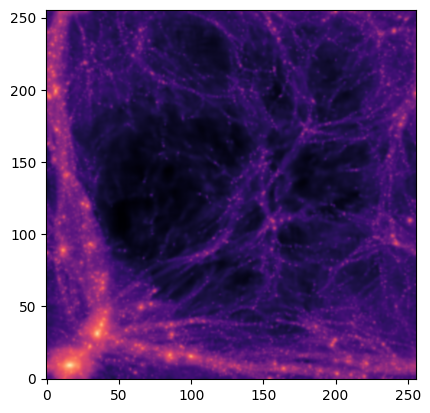

Value of the parameters for map #26
Omega_m: 0.11980
sigma_8: 0.79260
A_SN1:   1.46815
A_AGN1:  2.03073
A_SN2:   0.58601
A_AGN2:  0.90063


In [ ]:
# setting map number, indexed 0-14999, 15000 maps to 1000 params = map_number//15 to index param data from .txt file
map_number = 0
params_map = params[map_number//15]

plt.imshow(np.log10(maps[map_number]),cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
plt.show()

print('Value of the parameters for map #%d' % map_number)
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

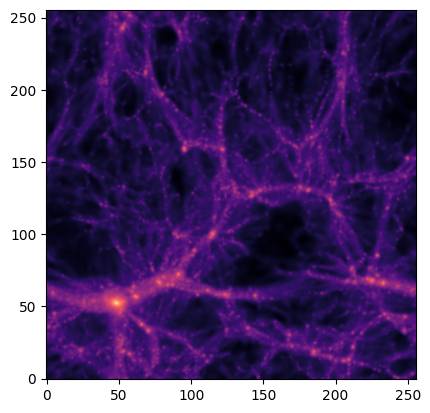

Value of the parameters for map #14999
Omega_m: 0.40180
sigma_8: 0.76260
A_SN1:   1.87384
A_AGN1:  1.06733
A_SN2:   0.55440
A_AGN2:  1.40932


In [ ]:
map_number2 = 14999
params_map2 = params[map_number2//15]

plt.imshow(np.log10(maps[map_number2]),cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
plt.show()

print('Value of the parameters for map #%d' % map_number2)
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])